# Introducción a la API funcional de Keras

#### Diplomado en Inteligencia Artificial y Aprendizaje Profundo

### Importamos librerias necesarias

In [57]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
print('Versión de TensorFlow:', tf.__version__)

# Objetos de la API de Keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras import Model

# Datos MNIST
from tensorflow.keras.datasets import mnist

Versión de TensorFlow: 2.13.0


### Preparando datos de MNIST

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

print(f'shapes:\n\tx_train: {x_train.shape}\n\ty_train: {y_train.shape}\n\tx_test: {x_test.shape}\n\ty_test: {y_test.shape}\n')

# Agregamos una dimensión para manejo de imágenes en tensorflow
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

print(f'new_shapes:\n\tx_train: {x_train.shape}\n\ty_train: {y_train.shape}\n\tx_test: {x_test.shape}\n\ty_test: {y_test.shape}')

shapes:
	x_train: (60000, 28, 28)
	y_train: (60000,)
	x_test: (10000, 28, 28)
	y_test: (10000,)

new_shapes:
	x_train: (60000, 28, 28, 1)
	y_train: (60000,)
	x_test: (10000, 28, 28, 1)
	y_test: (10000,)


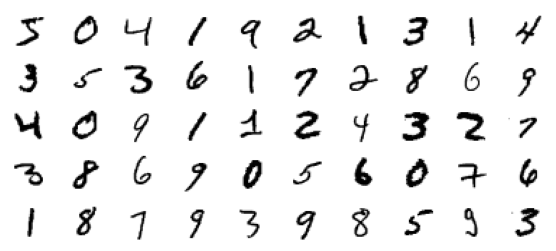

labels: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [45]:
# Mostramos las primeras 50 imágenes de x_train

n, m = 5, 10
plt.figure(figsize=(3*m//4,3*n//4))

for idx in range(0,n*m):
    plt.subplot(n,m,idx+1)
    plt.imshow(x_train[idx], cmap='binary')
    plt.axis('off')

plt.show()
print('labels:', y_train[:n*m])

### Derivando un modelo de la clase `Model` de la API funcional de Keras

In [47]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()  # inicializamos el nuestro modelo de la clase Model
        self.conv1 = Conv2D(32, 3, strides=2, padding='same')
        self.normalization1 = BatchNormalization()
        self.activation1 = Activation('relu')
        self.maxpooling1 = MaxPooling2D(3, strides=2, padding='same')
        self.dropout1 = Dropout(0.4)
        self.conv2 = Conv2D(64, 3, strides=2, padding='same')
        self.normalization2 = BatchNormalization()
        self.activation2 = Activation('relu')
        self.global_average = GlobalAveragePooling2D()
        self.d1 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.normalization1(x)
        x = self.activation1(x)
        x = self.maxpooling1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.normalization2(x)
        x = self.activation2(x)
        x = self.global_average(x)
        return self.d1(x)

# Creamos una instancia del modelo
model = MyModel()

In [66]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 batch_normalization (Batch  multiple                  128       
 Normalization)                                                  
                                                                 
 activation (Activation)     multiple                  0         
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 conv2d_1 (Conv2D)           multiple                  184

In [53]:
# Compilamos el modelo
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),  # se puede decidir usar una porción de los datos de entrenamiento
                    batch_size = 64,  # por defecto en 32
                    shuffle = True,
                    verbose = 2,  # muestra los resultados de cada epoca
                    epochs = 10)

Epoch 1/10
938/938 - 4s - loss: 1.0634 - accuracy: 0.7030 - val_loss: 0.5682 - val_accuracy: 0.8634 - 4s/epoch - 5ms/step
Epoch 2/10
938/938 - 4s - loss: 0.5021 - accuracy: 0.8692 - val_loss: 0.3801 - val_accuracy: 0.9040 - 4s/epoch - 4ms/step
Epoch 3/10
938/938 - 4s - loss: 0.3422 - accuracy: 0.9127 - val_loss: 0.2320 - val_accuracy: 0.9397 - 4s/epoch - 4ms/step
Epoch 4/10
938/938 - 4s - loss: 0.2718 - accuracy: 0.9278 - val_loss: 0.1700 - val_accuracy: 0.9564 - 4s/epoch - 4ms/step
Epoch 5/10
938/938 - 4s - loss: 0.2322 - accuracy: 0.9372 - val_loss: 0.1427 - val_accuracy: 0.9635 - 4s/epoch - 5ms/step
Epoch 6/10
938/938 - 4s - loss: 0.2085 - accuracy: 0.9429 - val_loss: 0.1389 - val_accuracy: 0.9619 - 4s/epoch - 4ms/step
Epoch 7/10
938/938 - 4s - loss: 0.1890 - accuracy: 0.9468 - val_loss: 0.1249 - val_accuracy: 0.9667 - 4s/epoch - 4ms/step
Epoch 8/10
938/938 - 4s - loss: 0.1748 - accuracy: 0.9509 - val_loss: 0.1018 - val_accuracy: 0.9711 - 4s/epoch - 4ms/step
Epoch 9/10
938/938 - 4s 

### Gráficos

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.063372,0.703000,0.568198,0.8634,0
1,0.502150,0.869167,0.380053,0.9040,1
2,0.342188,0.912717,0.232014,0.9397,2
3,0.271773,0.927783,0.169965,0.9564,3
4,0.232214,0.937183,0.142685,0.9635,4
5,0.208539,0.942883,0.138910,0.9619,5
6,0.188964,0.946783,0.124904,0.9667,6
7,0.174773,0.950867,0.101776,0.9711,7
8,0.165366,0.952967,0.103176,0.9720,8
9,0.157230,0.954433,0.119867,0.9633,9


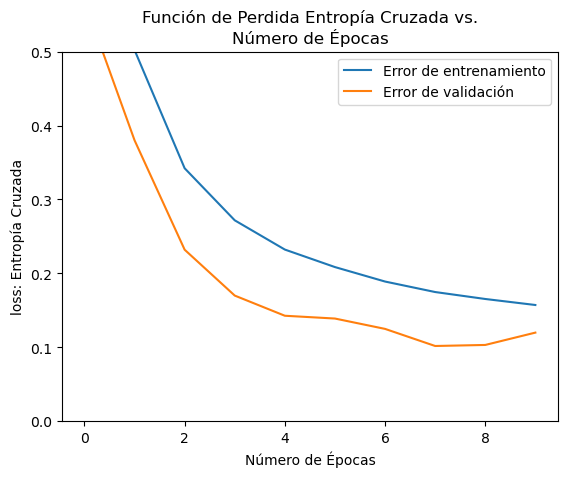

In [63]:
# Función de Perdida por Epoca
plt.figure()
plt.plot(hist['epoch'], hist['loss'], label='Error de entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'], label='Error de validación')
plt.title('Función de Perdida Entropía Cruzada vs.\nNúmero de Épocas')
plt.xlabel('Número de Épocas')
plt.ylabel('loss: Entropía Cruzada')
plt.ylim([0,0.5])
plt.legend()
plt.show()

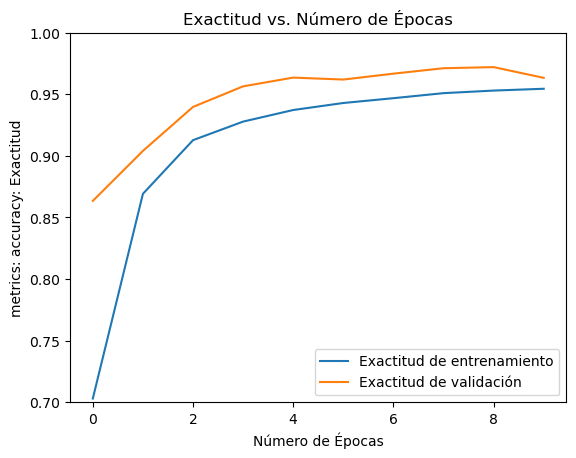

In [65]:
# Exactitud por Epoca
plt.figure()
plt.plot(hist['epoch'], hist['accuracy'], label='Exactitud de entrenamiento')
plt.plot(hist['epoch'], hist['val_accuracy'], label='Exactitud de validación')
plt.title('Exactitud vs. Número de Épocas')
plt.xlabel('Número de Épocas')
plt.ylabel('metrics: accuracy: Exactitud')
plt.ylim([0.7,1])
plt.legend()
plt.show()